Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 30, 30, 34)        952       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 15, 15, 34)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 13, 13, 55)        16885     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 6, 6, 55)         0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 4, 4, 58)          28768     
                                                                 
 flatten_3 (Flatten)         (None, 928)              

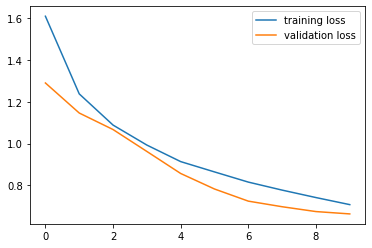

In [5]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt


import matplotlib.pyplot as plt

# Load CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = keras.datasets.cifar10.load_data()

# Normalize pixel values to range [0, 1]
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

# Split training set into training and validation sets
train_images = train_images[5000:]
train_labels = train_labels[5000:]
val_images = train_images[:5000]
val_labels = train_labels[:5000]


# Define CNN model
model = keras.models.Sequential([
    keras.layers.Conv2D(34, (3,3), activation='relu', input_shape=(32,32,3)),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(55, (3,3), activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(58, (3,3), activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(56, activation='relu'),
    keras.layers.Dense(11, activation='softmax')
])

model.summary()

# Compile model
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train model with learning curves
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(val_images, val_labels))

# Evaluate model on test set
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)


plt.plot(history.history["loss"], label="training loss")
plt.plot(history.history["val_loss"], label="validation loss")
plt.legend()
plt.show()